In [6]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

# import sys
# sys.path.append("../")
# import GSHEWaveform

%load_ext autoreload
%autoreload 2


def setmplstyle(fpath=None):
    """
    Set the matplotlib style. If `fpath` is `None` uses the default style.
    Arguments
    ---------
    fpath: str, optional
        Path to the style text file.
    """
    if fpath is None:
        mpl.rcParams.update(mpl.rcParamsDefault)
    else:
        mpl.style.use(fpath)


def ylabel_withoffset(ax, label):
    """
    Draw the y-label of the given axis with its offset.
    Arguments
    ---------
    ax: py:class:`matplotlib.axes._subplots.AxesSubplot`
        Matplotlib axis.
    label: str
        They y-axis label.
    """
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()
    ax.set_ylabel(r"{} {}".format(label, offset))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
runID = "01"


Xgeos = np.load("../data/run_{}/Xgeos.npy".format(runID))
Xgshes = np.load("../data/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../data/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../data/run_{}/alphas.npy".format(runID))
betas = np.load("../data/run_{}/betas.npy".format(runID))
thetaobs = np.load("../data/run_{}/VaryParam.npy".format(runID))

dmerger = np.abs(Xgeos[:, 0, 2] - Xgeos[:, 1, 2])


k = np.abs(thetaobs - 0.4*np.pi).argmin()

print(thetaobs[k] / np.pi)
Xgeo = Xgeos[k, ...]
Xgshe = Xgshes[k, ...]

0.39900110450361087


<IPython.core.display.Javascript object>


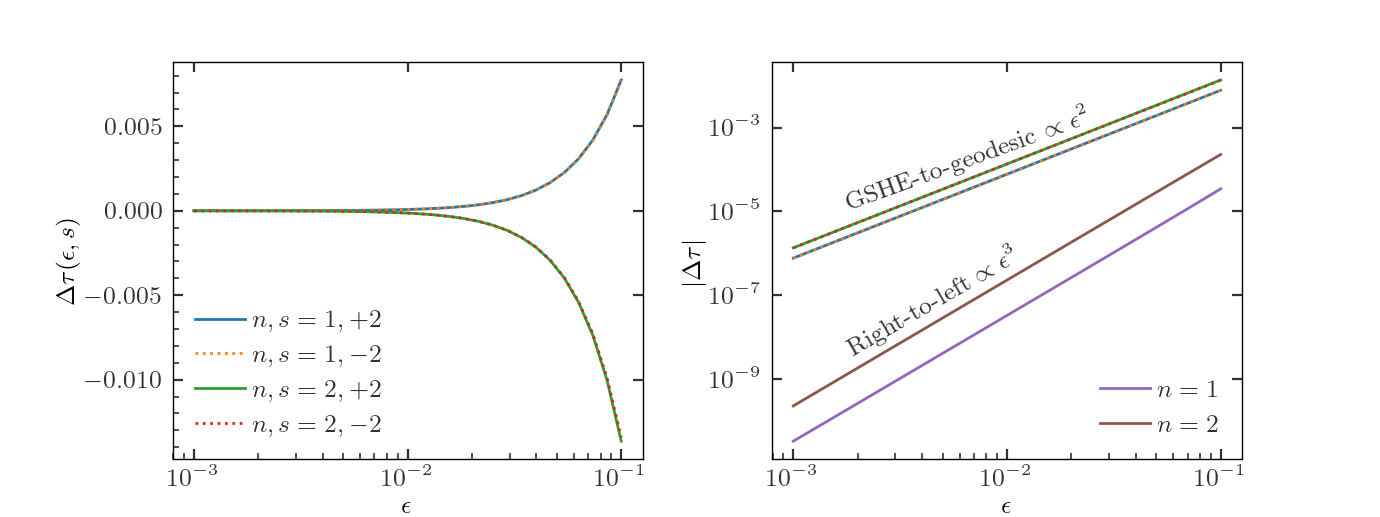

In [8]:
setmplstyle("../plot_style.txt")
# GSHEWaveform.setmplstyle("../plot_style.txt")

polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}
# default_mplstyle()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(3.45*2,3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.275)

for igeo in [0, 1]:
    for s in [0, 1]:
        dtgeo = Xgshe[igeo, s, :, 2] - Xgeo[igeo, 2]

        label = r"$n, s = {},{}$".format(igeo+1, polardict[s])
            
        axes[0].plot(epsilons, dtgeo, ls=polarls[s],label=label)
        axes[1].plot(epsilons, np.abs(dtgeo), ls=polarls[s])
        
    
for igeo in [0, 1]:
    dtpol = np.abs(Xgshe[igeo, 0, :, 2] - Xgshe[igeo, 1, :, 2])
    label = r"$n = {}$".format(igeo+1)
    axes[1].plot(epsilons, dtpol, label=label)
        

        
plt.savefig("/Users/richard/Downloads/_tmp.png")

axes[0].legend()
for ax in axes:
    ax.set_xlabel(r"$\epsilon$")
    ax.set_xscale("log")
    

axes[0].legend()
axes[1].legend(loc=4)
# GSHEWaveform.ylabel_withoffset(axes[0], r"$\Delta \tau(\epsilon, s)$")
ylabel_withoffset(axes[0], r"$\Delta \tau(\epsilon, s)$")
axes[1].set_ylabel(r"$|\Delta \tau|$")


axes[1].set_yscale("log")
axes[1].set_yscale("log")

# Slope comments
axes[1].text(0.15, 0.90, r"GSHE-to-geodesic $\propto \epsilon^2$", transform=axes[1].transAxes,
        verticalalignment='top', rotation=20)
axes[1].text(0.15, 0.55, r"Right-to-left $\propto \epsilon^3$", transform=axes[1].transAxes,
        verticalalignment='top', rotation=30)

fig.savefig("/Users/richard/Downloads/configuration_delay.pdf", bbox_inches="tight", dpi=300)
fig.show()